In [8]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%config InlineBackend.figure_format = 'retina'

In [6]:

file_path = "flights_2008.csv.bz2"
df = pd.read_csv(file_path, compression="bz2")

df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [16]:
dtype = {
    "DayOfWeek": np.uint8,
    "DayofMonth": np.uint8,
    "Month": np.uint8,
    "Cancelled": np.uint8,
    "Year": np.uint16,
    "FlightNum": np.uint16,
    "Distance": np.uint16,
    "UniqueCarrier": str,
    "CancellationCode": str,
    "Origin": str,
    "Dest": str,
    "ArrDelay": np.float32,
    "DepDelay": np.float32,
    "CarrierDelay": np.float32,
    "WeatherDelay": np.float32,
    "NASDelay": np.float32,
    "SecurityDelay": np.float32,
    "LateAircraftDelay": np.float32,
    "DepTime": np.float32,
}

In [11]:
flights_df = pd.read_csv("flights_2008.csv.bz2", usecols=dtype.keys(), dtype=dtype)

In [12]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [13]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


In [15]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               uint16 
 1   Month              uint8  
 2   DayofMonth         uint8  
 3   DayOfWeek          uint8  
 4   DepTime            float32
 5   UniqueCarrier      object 
 6   FlightNum          uint16 
 7   ArrDelay           float32
 8   DepDelay           float32
 9   Origin             object 
 10  Dest               object 
 11  Distance           uint16 
 12  Cancelled          uint8  
 13  CancellationCode   object 
 14  CarrierDelay       float32
 15  WeatherDelay       float32
 16  NASDelay           float32
 17  SecurityDelay      float32
 18  LateAircraftDelay  float32
dtypes: float32(8), object(4), uint16(3), uint8(4)
memory usage: 494.7+ MB


In [15]:
flights_df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,FlightNum,ArrDelay,DepDelay,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.855029e+06,6.873482e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333831e+03,2.224200e+03,8.168451e+00,9.972576e+00,7.263870e+02,1.960618e-02,1.577207e+01,3.039031e+00,1.716463e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.783713e+02,1.961716e+03,3.824731e+01,3.493030e+01,5.621018e+02,1.386426e-01,4.012571e+01,1.942898e+01,3.183818e+01,1.836461e+00,3.914056e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,6.220000e+02,-1.000000e+01,-4.000000e+00,3.250000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.571000e+03,-2.000000e+00,-1.000000e+00,5.810000e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,3.518000e+03,1.200000e+01,8.000000e+00,9.540000e+02,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,9.743000e+03,2.461000e+03,2.467000e+03,4.962000e+03,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [17]:
flights_df["UniqueCarrier"].nunique()

20

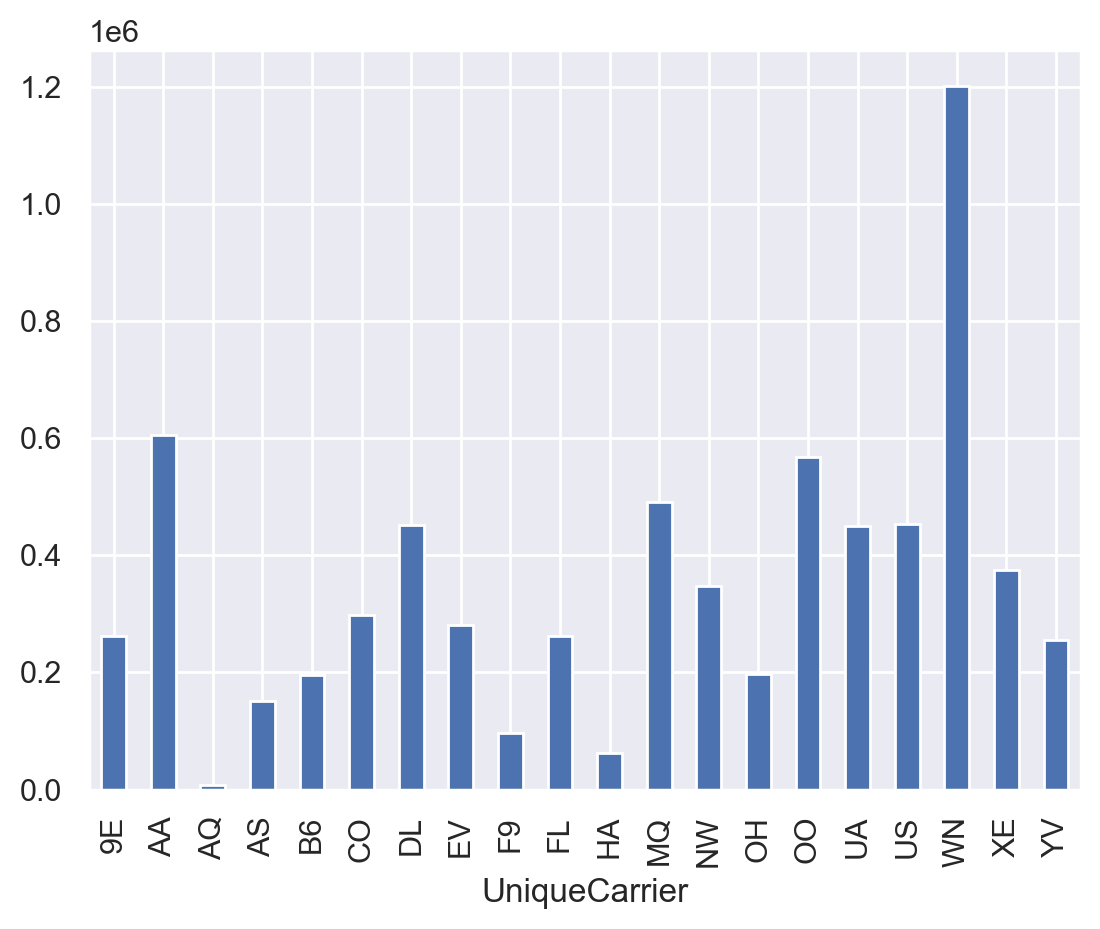

In [18]:
# Количество рейсов по перевозчикам 
flights_df.groupby("UniqueCarrier").size().plot(kind="bar");

In [19]:
flights_df.groupby(["UniqueCarrier", "FlightNum"])["Distance"].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244
               14           1796244
UA             52           1789722
Name: Distance, dtype: uint64

In [20]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


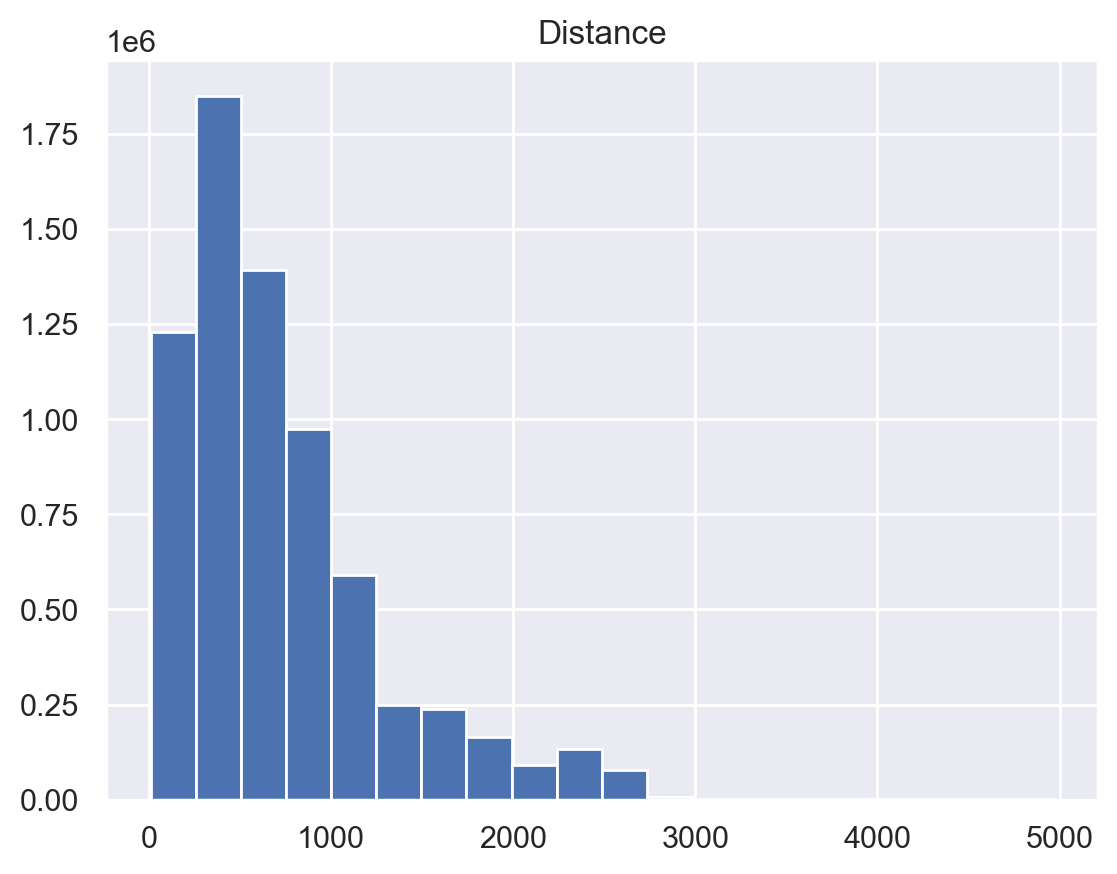

In [21]:
flights_df.hist("Distance", bins=20);

In [22]:
flights_df["Date"] = pd.to_datetime(
    flights_df.rename(columns={"DayofMonth": "Day"})[["Year", "Month", "Day"]]
)

In [23]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03


In [24]:
num_flights_by_date = flights_df.groupby("Date").size()

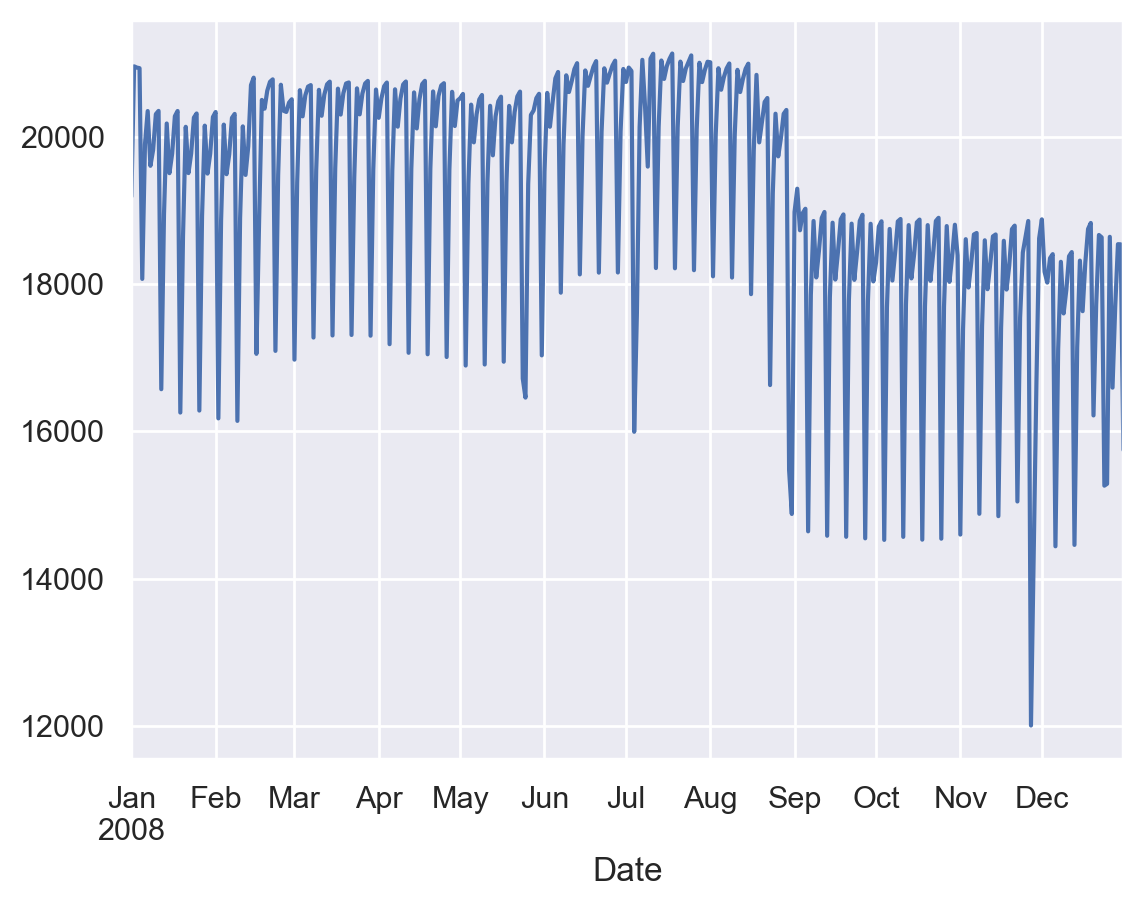

In [25]:
num_flights_by_date.plot();

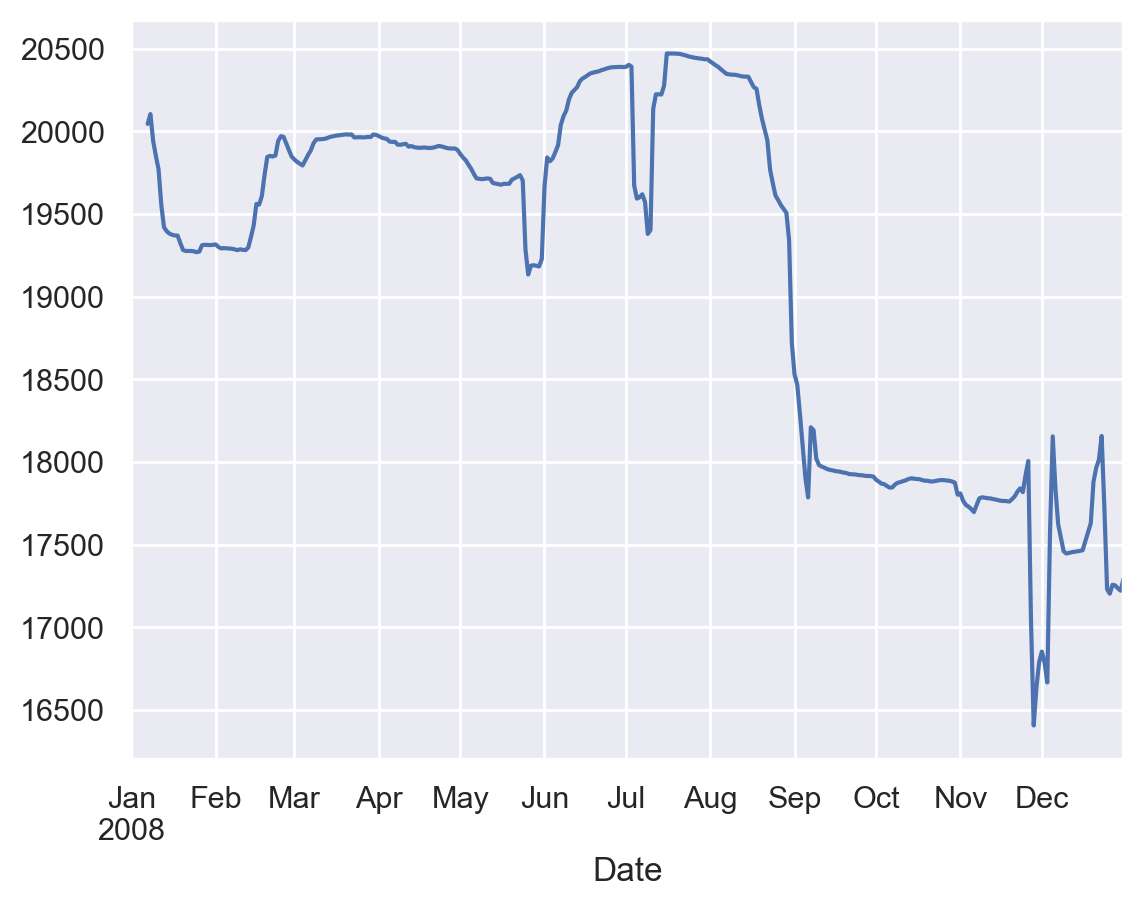

In [26]:
num_flights_by_date.rolling(window=7).mean().plot();

In [27]:
flights_df["DepHour"] = flights_df["DepTime"] // 100
flights_df["DepHour"].replace(to_replace=24, value=0, inplace=True)
flights_df.head()

C:\Users\timur\AppData\Local\Temp\ipykernel_10812\796107878.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flights_df["DepHour"].replace(to_replace=24, value=0, inplace=True)


,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DepHour
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,...,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,20.0
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,7.0
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,6.0
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,...,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,9.0
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,...,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03,18.0


In [28]:
flights_df["DepHour"].describe()

count    6.873482e+06
mean     1.303737e+01
std      4.764949e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.300000e+01
75%      1.700000e+01
max      2.300000e+01
Name: DepHour, dtype: float64

In [ ]:
Вопрос 1. Набор данных включает как отмененные, так и завершенные рейсы. Определите, есть ли больше выполненных или отмененных рейсов, и посчитайте числовую разницу между ними.

Отмененных рейсов больше, чем выполненных на 329.
Выполнено рейсов больше отмененных на 6 734 860.
Отмененные рейсы превышают выполненные на 671.
Выполнено рейсов больше, чем отменено на 11 088 967.

In [31]:
cancelled_count = flights_df["Cancelled"].sum()
completed_count = len(flights_df) - cancelled_count
difference = abs(completed_count - cancelled_count)

print(f"Выполненные рейсы: {completed_count}")
print(f"Отмененные рейсы: {cancelled_count}")
print(f"Числовая разница: {difference}")

Выполненные рейсы: 6872294.0
Отмененные рейсы: 137434
Числовая разница: 6734860.0


In [ ]:
# ОТВЕТ: Выполнено рейсов больше отмененных на 6 734 860.

In [ ]:
Вопрос 2. Найдите рейс с наибольшей задержкой вылета и рейс с наибольшей задержкой прибытия. Летят ли они в один аэропорт, и если да, то какой у него код?

да, ATL
да, HNL
да, MSP
нет

In [32]:
max_dep_delay_flight = flights_df.loc[flights_df["DepDelay"].idxmax()]
max_arr_delay_flight = flights_df.loc[flights_df["ArrDelay"].idxmax()]

print(f"Наибольшая задержка вылета: {max_dep_delay_flight['DepDelay']}, аэропорт прибытия: {max_dep_delay_flight['Dest']}")
print(f"Наибольшая задержка прибытия: {max_arr_delay_flight['ArrDelay']}, аэропорт прибытия: {max_arr_delay_flight['Dest']}")

if max_dep_delay_flight["Dest"] == max_arr_delay_flight["Dest"]:
    print(f"Да, {max_dep_delay_flight['Dest']}")
else:
    print("Нет")


Наибольшая задержка вылета: 2467.0, аэропорт прибытия: MSP
Наибольшая задержка прибытия: 2461.0, аэропорт прибытия: MSP
Да, MSP


In [ ]:
# ОТВЕТ: да, MSP

In [ ]:
Вопрос 3. Найдите перевозчика, у которого наибольшее количество отмененных рейсов.

АА
MQ
ВН
СО

In [37]:
cancelled_flights_by_carrier = flights_df.groupby("UniqueCarrier")["Cancelled"].sum()
max_cancelled_carrier = cancelled_flights_by_carrier.idxmax()

print(max_cancelled_carrier)


MQ


In [ ]:
# ОТВЕТ: MQ

In [ ]:
Вопрос 4. Давайте рассмотрим время отправления и рассмотрим распределение по часам (столбец DepHour, который мы создали ранее). В какой час самый высокий процент рейсов?

Подсказка: Проверьте формат времени здесь.

1 am
5 am
8 am
3 pm

In [39]:
departure_hour_counts = flights_df["DepHour"].value_counts(normalize=True) * 100
peak_hour = departure_hour_counts.idxmax()

print(peak_hour)

8.0


In [ ]:
# ОТВЕТ:8 am

In [ ]:
Вопрос 5. Хорошо, теперь давайте рассмотрим распределение отмененных рейсов по времени. В какой час наименьший процент отмененных рейсов?

2 am
9 pm
8 am
3 am

In [40]:
cancelled_flights = flights_df[flights_df["Cancelled"] == 1]
cancelled_by_hour = cancelled_flights["DepHour"].value_counts(normalize=True) * 100

least_cancelled_hour = cancelled_by_hour.idxmin()
print(least_cancelled_hour)


4.0


In [54]:
total_flights_by_hour = flights_df["DepHour"].value_counts()
cancelled_flights_by_hour = flights_df[flights_df["Cancelled"] == 1]["DepHour"].value_counts()
cancelled_percentage = (cancelled_flights_by_hour / total_flights_by_hour) * 100
least_cancelled_hour = cancelled_percentage.idxmin()
print(least_cancelled_hour)


13


In [51]:
print(flights_df["DepHour"].dtype)  
print(flights_df["DepHour"].unique()) 
print(flights_df[["DepTime", "DepHour"]].head(10))  


int32
[20  7  6  9 18 19 10 16 14 17 13  8 15 21 11 22 12  0  5 23  1  2  3  4]
   DepTime  DepHour
0   2003.0       20
1    754.0        7
2    628.0        6
3    926.0        9
4   1829.0       18
5   1940.0       19
6   1937.0       19
7   1039.0       10
8    617.0        6
9   1620.0       16


In [50]:
flights_df["DepHour"] = flights_df["DepHour"].astype(int)


In [49]:
flights_df["DepHour"] = flights_df["DepHour"].fillna(0).astype(int)


In [47]:
most_common_hour = flights_df["DepHour"].mode()[0]
flights_df["DepHour"] = flights_df["DepHour"].fillna(most_common_hour).astype(int)


In [57]:

total_flights_by_hour = flights_df["DepHour"].value_counts()
cancelled_flights_by_hour = flights_df[flights_df["Cancelled"] == 1]["DepHour"].value_counts()
cancelled_percentage = (cancelled_flights_by_hour / total_flights_by_hour) * 100
least_cancelled_hour = cancelled_percentage.idxmin()
print(least_cancelled_hour)


13


In [55]:

sorted_hours = cancelled_percentage.sort_values()

print(sorted_hours.head(5))

DepHour
13    0.010782
12    0.012493
9     0.012878
10    0.013211
11    0.013267
Name: count, dtype: float64


In [56]:
if 21 in sorted_hours.index:
    print(f"Процент отмен для 9 PM: {sorted_hours[21]:.5f}")
else:
    print("Данных для 9 PM нет в топе минимальных отмен.")


Процент отмен для 9 PM: 0.03218


In [ ]:
# ОТВЕТ: 9 pm

In [ ]:
Вопрос 6. Есть ли какой-нибудь час, в который вообще не было отмененных рейсов? Проверить все, что относится.

3
19
22
4

In [58]:

hours_without_cancellations = sorted_hours[sorted_hours == 0].index.tolist()

print(f"Часы, в которые не было отменённых рейсов: {hours_without_cancellations}")


Часы, в которые не было отменённых рейсов: []


In [59]:

hours_to_check = [3, 19, 22, 4]

for hour in hours_to_check:
    if hour in cancelled_flights_by_hour.index:
        print(f"Час {hour}: {cancelled_flights_by_hour[hour]} отмен")
    else:
        print(f"Час {hour}: 0 отмен (возможно, нет в данных)")


Час 3: 0 отмен (возможно, нет в данных)
Час 19: 81 отмен
Час 22: 57 отмен
Час 4: 1 отмен


In [ ]:
# ОТВЕТ:3 (возможно, не точно , не уверен, тревожность на максимуме)

In [ ]:
Вопрос 7. Найдите самый загруженный час или, другими словами, час, когда количество вылетающих рейсов достигает максимума.

Подсказка: Учитывайте только завершенные рейсы.

4
7
8
17

In [29]:
# Фильтр по завершенным рейсам
completed_flights = flights_df[flights_df["Cancelled"] == 0]

# группируем по часам и колво рейсов
flights_per_hour = completed_flights["DepHour"].value_counts()

# максимальноек колво рейсов по часам
busiest_hour = flights_per_hour.idxmax()
max_flights = flights_per_hour.max()

print(f"Самый загруженный час: {busiest_hour}, Количество рейсов: {max_flights}")


Самый загруженный час: 8.0, Количество рейсов: 449145


In [ ]:
# ОТВЕТ:8

In [ ]:
Вопрос 8. Поскольку мы знаем час отправления, было бы интересно изучить среднюю задержку для соответствующего часа. Бывают ли случаи, когда самолеты в среднем вылетали раньше положенного? И если да, то в какое время это произошло?

Подсказка: Учитывайте только завершенные рейсы.

нет, таких случаев не бывает
да, в 5-6 утра
да, в 9-10 утра
да, в 14-16.00

In [30]:
# Фильтр выполненные рейсы
completed_flights = flights_df[flights_df["Cancelled"] == 0]

# Рассчет среднюю задержку вылета по часам
avg_dep_delay = completed_flights.groupby("DepHour")["DepDelay"].mean()

# Проверка на отрицательные значения (ранние вылеты)
early_departures = avg_dep_delay[avg_dep_delay < 0]
print(early_departures)


DepHour
5.0   -4.255584
6.0   -1.629400
Name: DepDelay, dtype: float32


In [ ]:
# ОТВЕТ: да, в 5-6 утра

In [ ]:
Вопрос 9. Учитывая только выполненные перевозчиком рейсы, которые вы нашли в вопросе 3, найдите распределение этих рейсов по часам. В какое время вылетает наибольшее количество самолетов?

в полдень
в 7 утра
в 8 утра
в 10 утра

In [32]:
# Фильтруем данные по MQ и  выполненные рейсф
mq_flights = flights_df[(flights_df["UniqueCarrier"] == "MQ") & (flights_df["Cancelled"] == 0)]

# Группируем 
departure_distribution = mq_flights["DepHour"].value_counts()

# Находим час с максимальным количеством рейсов
max_hour = departure_distribution.idxmax()
max_hour_count = departure_distribution.max()

print(f"Час с наибольшим количеством вылетов для MQ: {max_hour}")


Час с наибольшим количеством вылетов для MQ: 10.0


In [ ]:
# ОТВЕТ:в 10 утра

In [ ]:
Вопрос 10. Найдите топ-10 перевозчиков по количеству выполненных рейсов (столбец UniqueCarrier)?

Что из перечисленного ниже нет в вашем списке топ-10?

DL
AA
OO
EV

In [34]:
# Фильтр выполненных рейсов
completed_flights = flights_df[flights_df["Cancelled"] == 0]

# Считаем колво выполненных рейсов для каждого перевозчика
carrier_counts = completed_flights["UniqueCarrier"].value_counts()

#  топ-10 перевозчиков
top_10_carriers = carrier_counts.head(10)


print(top_10_carriers)

#  какого перевозчика из списка нет в топ-10
given_carriers = {"DL", "AA", "OO", "EV"}
missing_carrier = given_carriers - set(top_10_carriers.index)

print(missing_carrier)


UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: count, dtype: int64
{'EV'}


In [ ]:
# ОТВЕТ:EV

In [ ]:
Вопрос 11. Постройте распределение причин отмены рейса (CancellationCode).

Какая наиболее частая причина отмены рейса?

Перевозчик
Погодные условия
Национальная воздушная система
Причины безопасности

In [35]:
import matplotlib.pyplot as plt

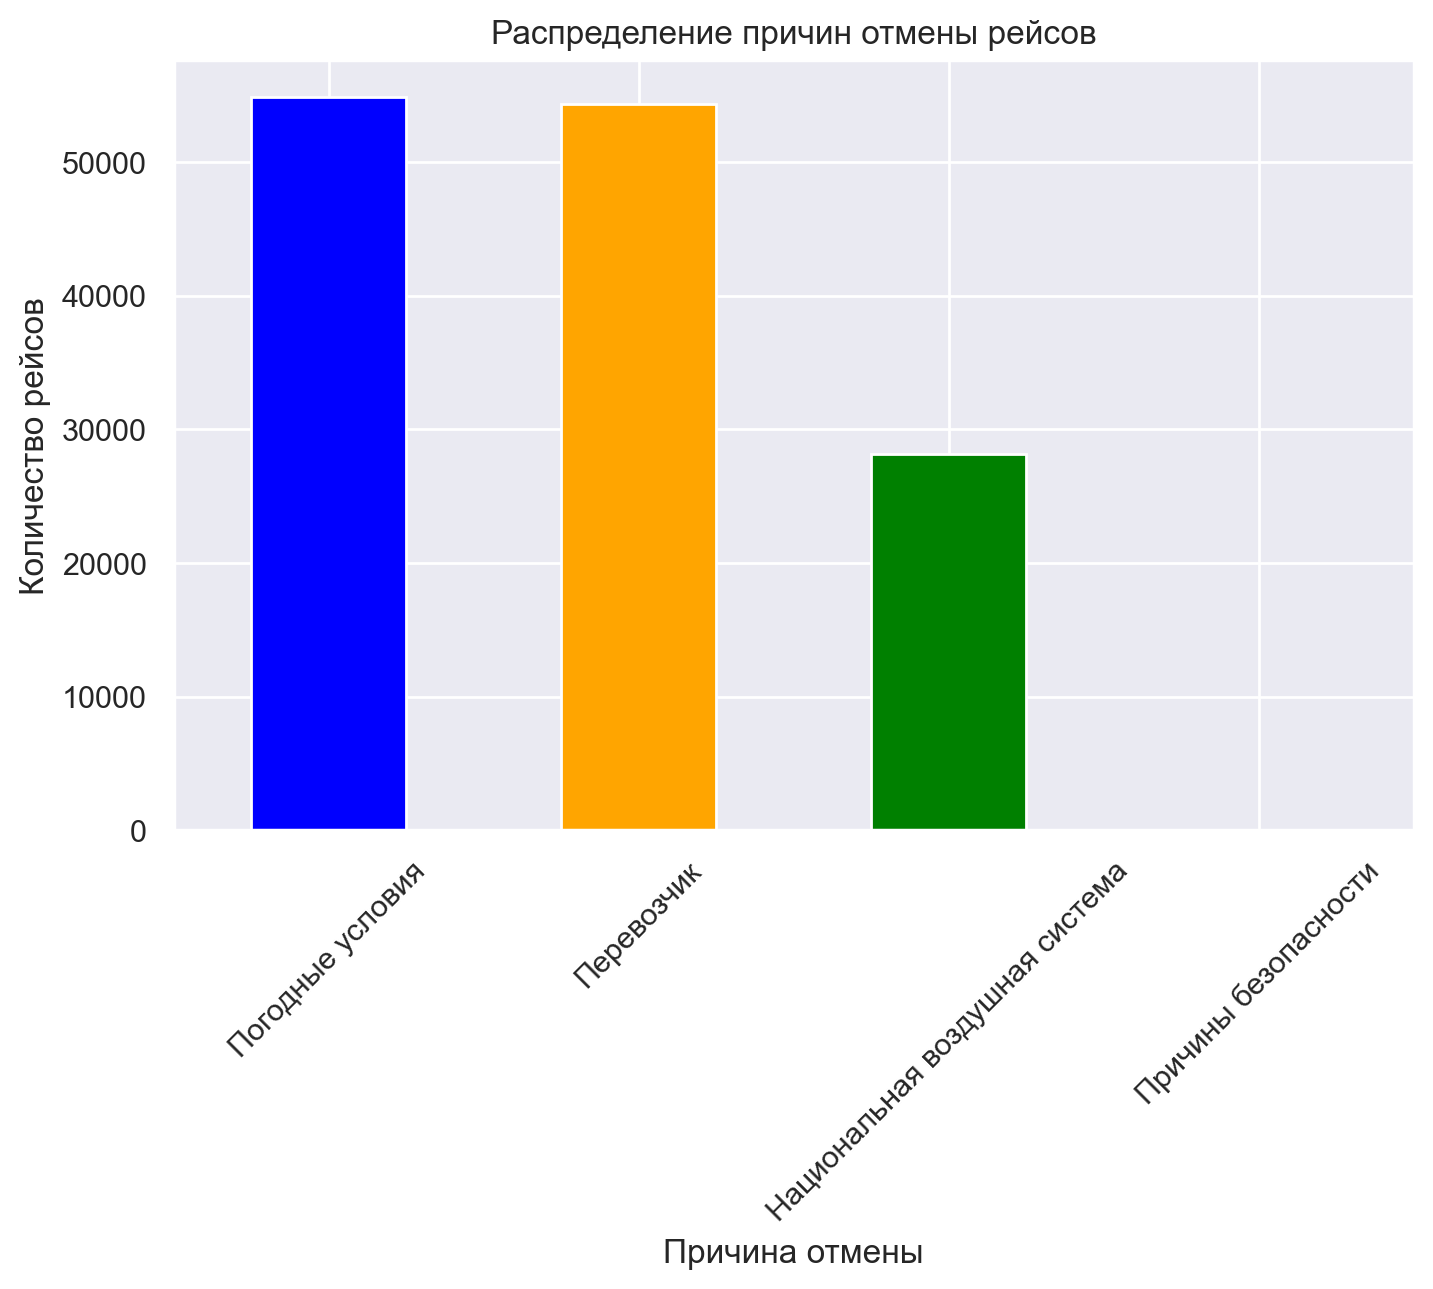

частая причина отмены : Погодные условия


In [37]:


# Фильтр отмененых рейсов
cancelled_flights = flights_df[flights_df["Cancelled"] == 1]

#количество каждой причины отмены
cancellation_counts = cancelled_flights["CancellationCode"].value_counts()

# словарь
cancellation_reasons = {
    "A": "Перевозчик",
    "B": "Погодные условия",
    "C": "Национальная воздушная система",
    "D": "Причины безопасности"
}

# индексы для удобства
cancellation_counts.index = cancellation_counts.index.map(cancellation_reasons)

# график
plt.figure(figsize=(8, 5))
cancellation_counts.plot(kind="bar", color=["blue", "orange", "green", "red"])
plt.title("Распределение причин отмены рейсов")
plt.xlabel("Причина отмены")
plt.ylabel("Количество рейсов")
plt.xticks(rotation=45)
plt.show()

most_common_reason = cancellation_counts.idxmax()
print(f"частая причина отмены : {most_common_reason}")


In [ ]:
# ОТВЕТ:Погодные условия

In [ ]:
Вопрос 12. Какой маршрут наиболее частый по количеству рейсов?

(Обратите внимание на столбцы 'Origin' и 'Dest'. Рассматривайте направления A->B и B->A как разные маршруты)

Нью-Йорк – Вашингтон (JFK-IAD)
Сан-Франциско – Лос-Анджелес (SFO-LAX)
Сан-Хосе – Даллас (SJC-DFW)
Нью-Йорк – Сан-Франциско (JFK-SFO)

In [40]:
#  новый столбец
flights_df["Route"] = flights_df["Origin"] + "-" + flights_df["Dest"]

# количество рейсов по маршрутам
route_counts = flights_df["Route"].value_counts()

# самый частый маршрут
most_common_route = route_counts.idxmax()
most_common_count = route_counts.max()

print(f"Наиболее частый маршрут: {most_common_route} ({most_common_count} рейсов)")


Наиболее частый маршрут: SFO-LAX (13788 рейсов)


In [ ]:
# ОТВЕТ:Сан-Франциско – Лос-Анджелес (SFO-LAX)

In [ ]:
Вопрос 13. . Найдите топ-5 задержанных маршрутов (посчитайте, сколько раз они задерживались при отправлении). Из всех рейсов по этим 5 маршрутам посчитайте все рейсы, погодные условия которых способствовали задержке.

Подсказка: учитывайте только положительные задержки

449
539
549
668

In [41]:
# Фильтруем задержанные рейсы (плюсовые)
delayed_flights = flights_df[flights_df["DepDelay"] > 0]

# столбец с маршрутом
delayed_flights["Route"] = delayed_flights["Origin"] + "-" + delayed_flights["Dest"]

# количество задержек по маршрутам
top_delayed_routes = delayed_flights["Route"].value_counts().head(5)

# Фильтр рейс погодные условия (WeatherDelay > 0)
weather_delayed_flights = delayed_flights[delayed_flights["WeatherDelay"] > 0]

#  количество рейсов для топ-5 маршрутов
weather_delayed_count = weather_delayed_flights[weather_delayed_flights["Route"].isin(top_delayed_routes.index)].shape[0]

print(weather_delayed_count)


668


C:\Users\timur\AppData\Local\Temp\ipykernel_10812\1856198433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_flights["Route"] = delayed_flights["Origin"] + "-" + delayed_flights["Dest"]


In [ ]:
# ОТВЕТ:668

In [ ]:
Вопрос 14. Изучите почасовое распределение времени отправления. Выберите все верные утверждения:

Рейсы равномерно распределены во временном интервале [0-23].
В период с 0 до 4 утра рейсов значительно меньше, чем с 19:00 до 20:00.

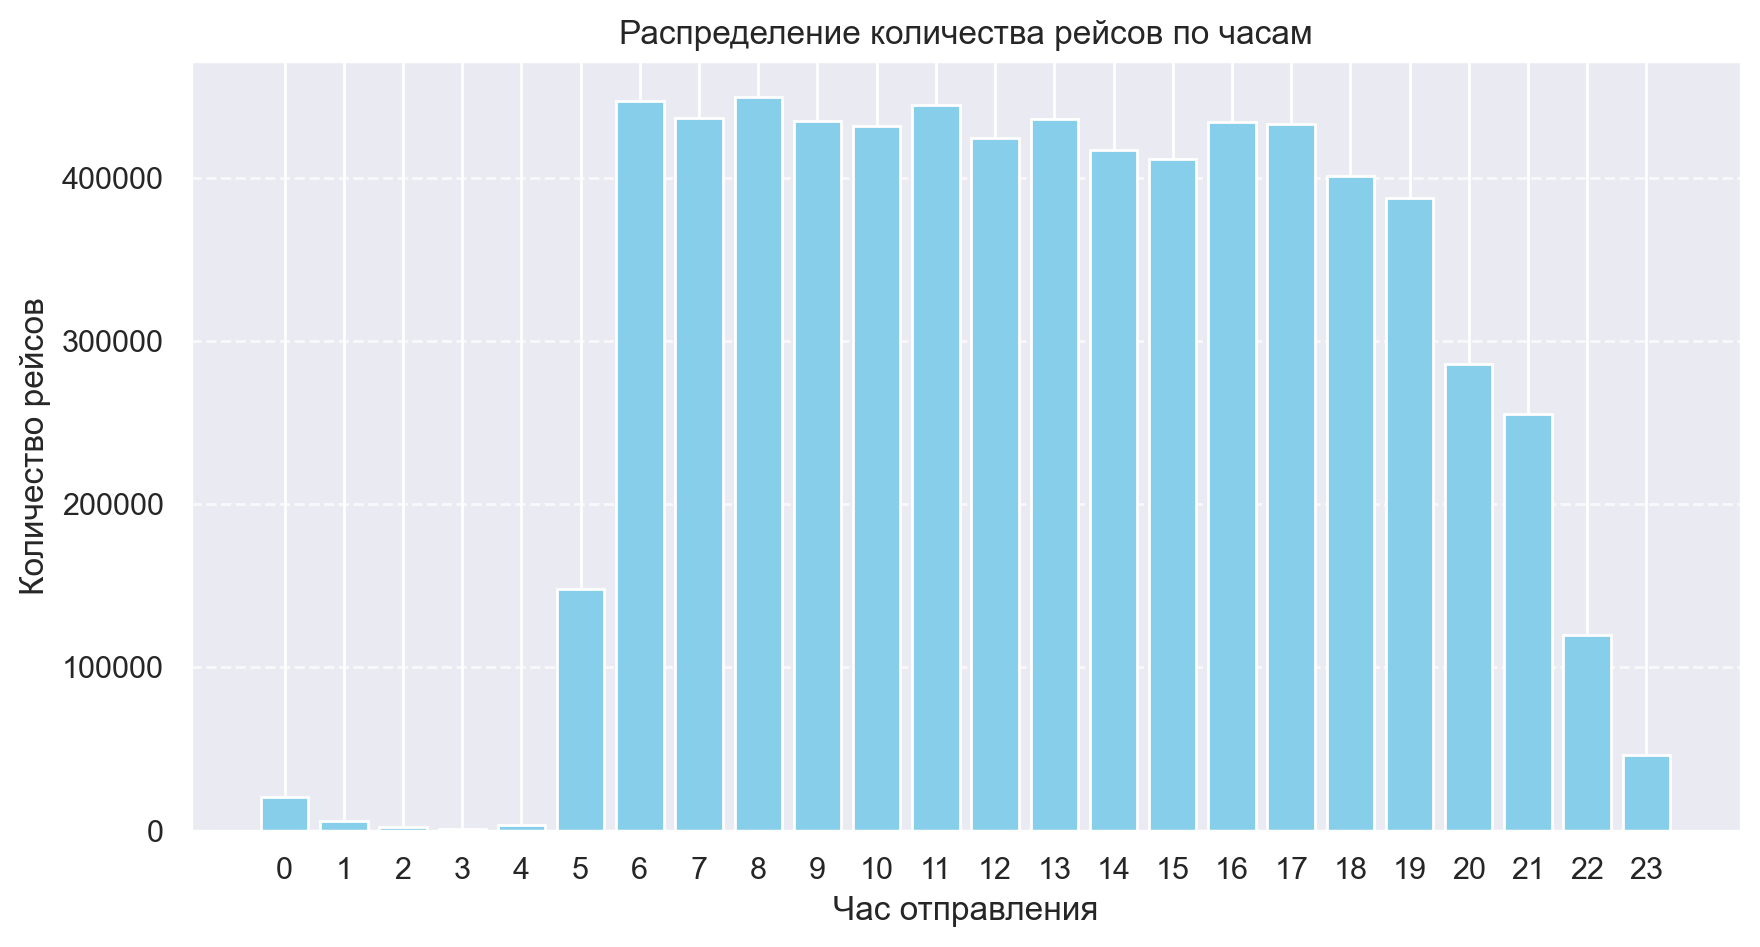

Количество рейсов с 0 до 4 утра: 32303
Количество рейсов с 19 до 20 вечера: 673279
 В период с 0 до 4 утра рейсов значительно меньше, чем с 19:00 до 20:00.
 Рейсы НЕ равномерно распределены по временным интервалам [0-23].


In [42]:
# Группируем данные по часам
hourly_flights = flights_df["DepHour"].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(10, 5))
plt.bar(hourly_flights.index, hourly_flights.values, color="skyblue")
plt.xlabel("Час отправления")
plt.ylabel("Количество рейсов")
plt.title("Распределение количества рейсов по часам")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Проверка интервала 0-4 и 19-20
early_morning_flights = hourly_flights.loc[0:4].sum()
evening_flights = hourly_flights.loc[19:20].sum()

print(f"Количество рейсов с 0 до 4 утра: {early_morning_flights}")
print(f"Количество рейсов с 19 до 20 вечера: {evening_flights}")

# Выводим заключение
if early_morning_flights < evening_flights:
    print(" В период с 0 до 4 утра рейсов значительно меньше, чем с 19:00 до 20:00.")
else:
    print(" В период с 0 до 4 утра не наблюдается значительного спада.")

# Проверяем равномерность 
std_dev = hourly_flights.std()
mean_flights = hourly_flights.mean()

if std_dev / mean_flights > 0.2:  # 20% отклонение от среднего
    print(" Рейсы НЕ равномерно распределены по временным интервалам [0-23].")
else:
    print(" Рейсы равномерно распределены по временным интервалам [0-23].")

In [ ]:
Вопрос 15. Покажите, как количество рейсов меняется со временем (ежедневно/еженедельно/ежемесячно) и интерпретируйте полученные результаты.

Выберите все правильные утверждения:

Количество рейсов в выходные дни меньше, чем в будние (рабочие дни).
Наименьшее количество рейсов приходится на воскресенье.
Зимой рейсов меньше, чем летом.
Подсказка: ищите официальные метеорологические зимние месяцы для Северного полушария.

In [52]:

flights_df["Date"] = pd.to_datetime(flights_df[["Year", "Month", "DayofMonth"]])

# Анализ ежедневных рейсов
daily_flights = flights_df.groupby("Date").size()

plt.figure(figsize=(12, 5))
plt.plot(daily_flights, color="blue")
plt.xlabel("Дата")
plt.ylabel("Количество рейсов")
plt.title("Динамика количества рейсов по дням")
plt.grid()
plt.show()

# Анализ еженедельных рейсов
flights_df["DayOfWeek"] = flights_df["Date"].dt.dayofweek  # 0 - понедельник, 6 - воскресенье
weekly_flights = flights_df["DayOfWeek"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=weekly_flights.index, y=weekly_flights.values, palette="Blues_r")
plt.xticks(ticks=range(7), labels=["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"])
plt.xlabel("День недели")
plt.ylabel("Количество рейсов")
plt.title("Количество рейсов по дням недели")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Анализ ежемесячых рейсов
monthly_flights = flights_df["Month"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_flights.index, y=monthly_flights.values, palette="coolwarm")
plt.xticks(range(1, 13))
plt.xlabel("Месяц")
plt.ylabel("Количество рейсов")
plt.title("Количество рейсов по месяцам")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Интерпретация:
weekend_flights = weekly_flights.loc[5] + weekly_flights.loc[6]  # Суббота + Воскресенье
weekday_flights = weekly_flights.sum() - weekend_flights

print(f"Количество рейсов в будни: {weekday_flights}")
print(f"Количество рейсов в выходные: {weekend_flights}")

if weekend_flights < weekday_flights:
    print(" Количество рейсов в выходные дни меньше, чем в будние.")
else:
    print(" Количество рейсов в выходные не меньше, чем в будние.")

# Проверяем наименьшее количество рейсов по дням недели
if weekly_flights.idxmin() == 6:
    print(" Наименьшее количество рейсов приходится на воскресенье.")
else:
    print(" Воскресенье не является наименьшим числом рейсов.")

# Проверяем зимние месяцы (декабрь, январь, февраль)
winter_flights = monthly_flights.loc[[12, 1, 2]].sum()
summer_flights = monthly_flights.loc[[6, 7, 8]].sum()

print(f"Количество рейсов зимой: {winter_flights}")
print(f"Количество рейсов летом: {summer_flights}")

if winter_flights < summer_flights:
    print(" Зимой рейсов меньше, чем летом.")
else:
    print(" Зимой не меньше рейсов, чем летом.")


KeyError: "['DayofMonth'] not in index"

In [44]:
print(flights_df.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Date', 'DepHour',
       'Route'],
      dtype='object')


In [45]:
flights_df = flights_df.drop(columns=["Date"], errors="ignore")

flights_df["Date"] = pd.to_datetime(flights_df[["Year", "Month", "DayofMonth"]])


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day] is missing

In [46]:
print(flights_df[["Year", "Month", "DayofMonth"]].head())


   Year  Month  DayofMonth
0  2008      1           3
1  2008      1           3
2  2008      1           3
3  2008      1           3
4  2008      1           3


In [47]:
flights_df["Date"] = pd.to_datetime(flights_df[["Year", "Month", "DayofMonth"]])


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day] is missing

In [49]:
flights_df["Date"] = pd.to_datetime(
    flights_df[["Year", "Month", "DayofMonth"]].astype(int)
)


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day] is missing

In [50]:
flights_df = flights_df.rename(columns={"DayofMonth": "Day"})
flights_df["Date"] = pd.to_datetime(flights_df[["Year", "Month", "Day"]])


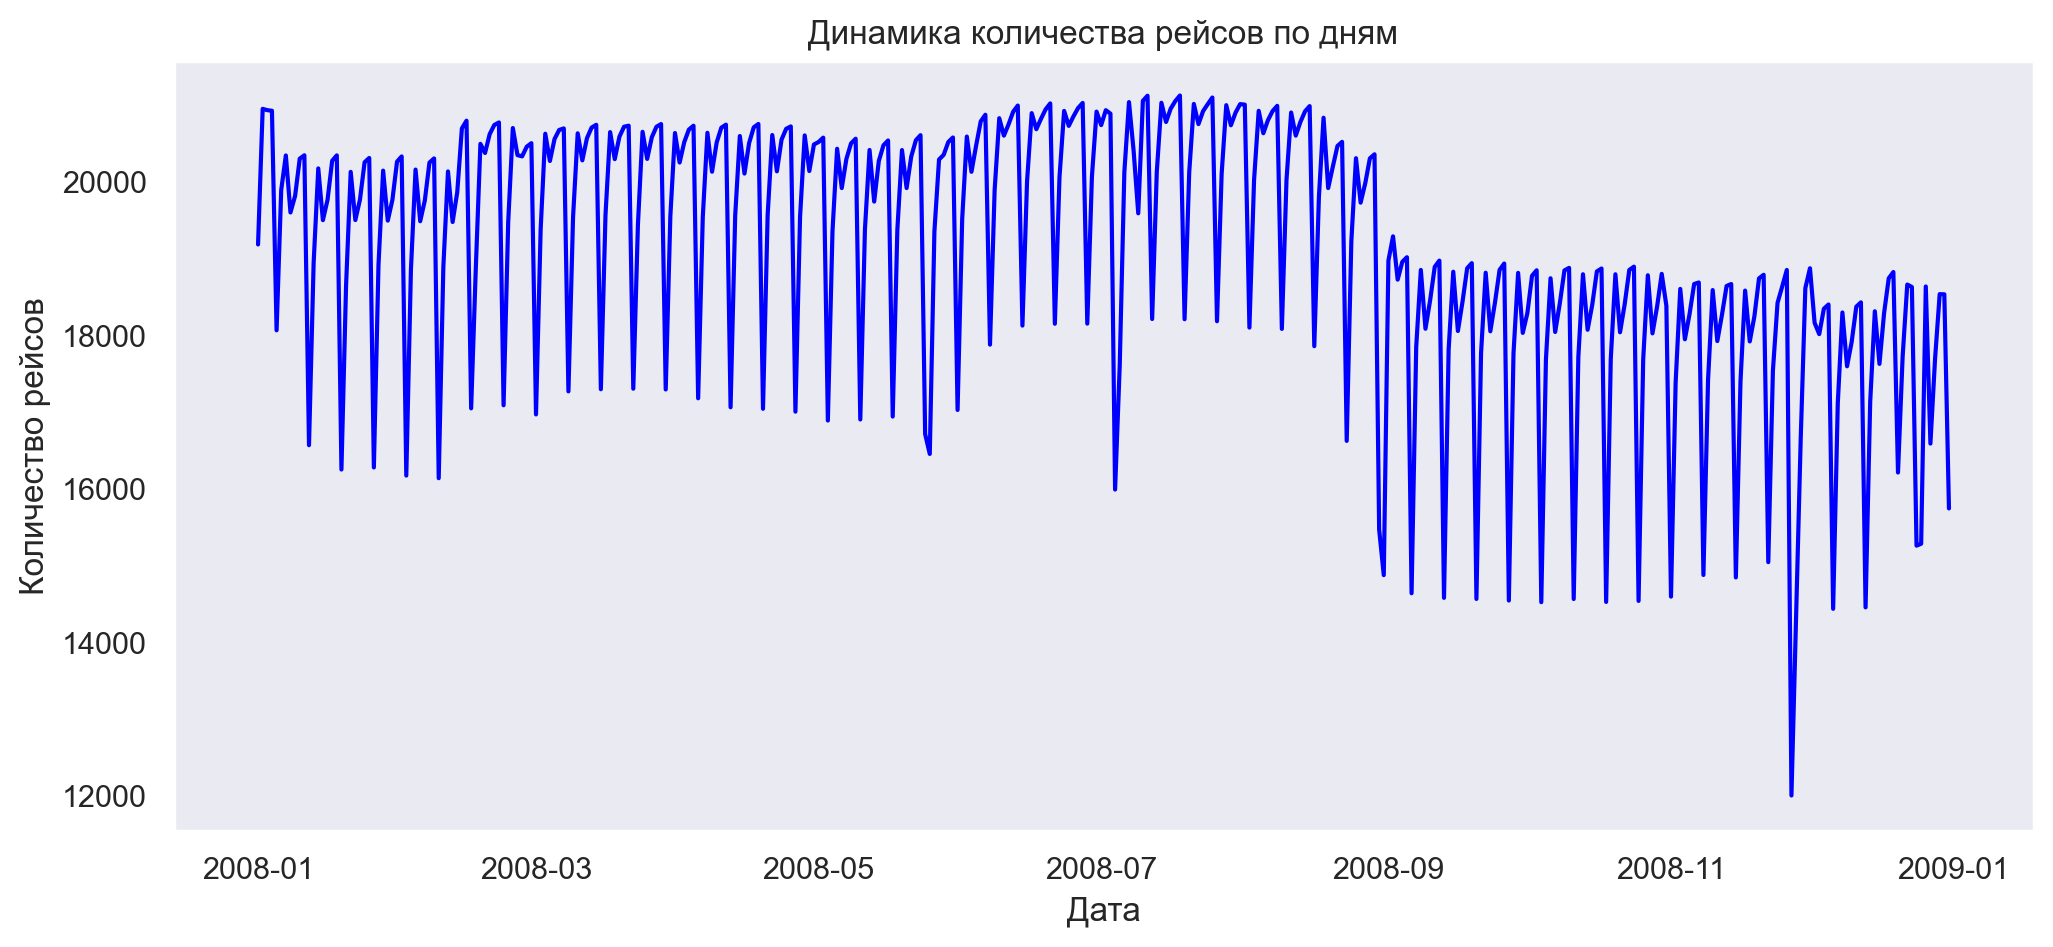

C:\Users\timur\AppData\Local\Temp\ipykernel_10812\1371788736.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_flights.index, y=weekly_flights.values, palette="Blues_r")


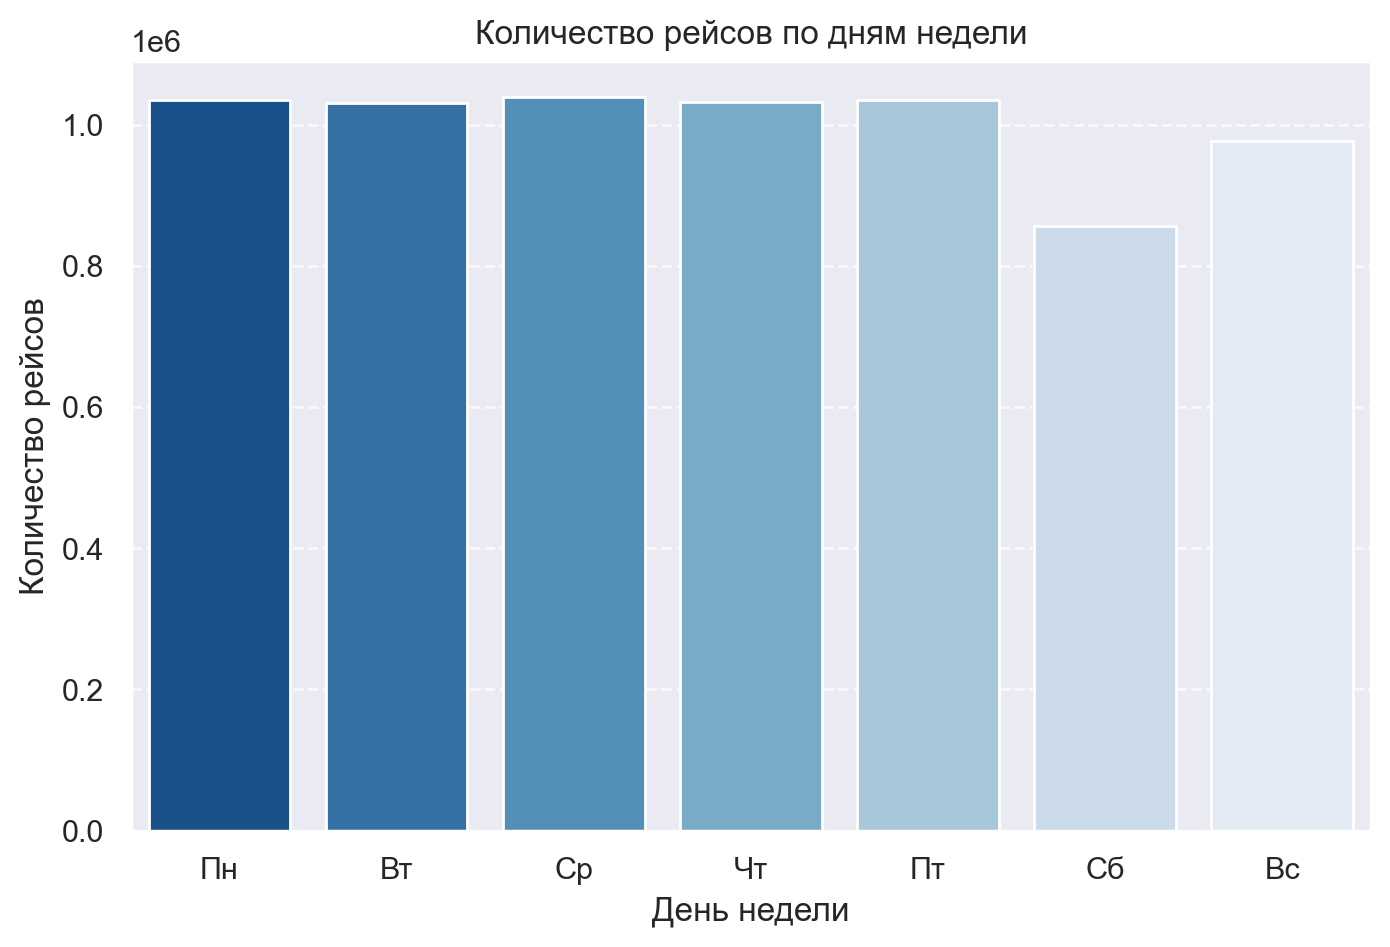

C:\Users\timur\AppData\Local\Temp\ipykernel_10812\1371788736.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_flights.index, y=monthly_flights.values, palette="coolwarm")


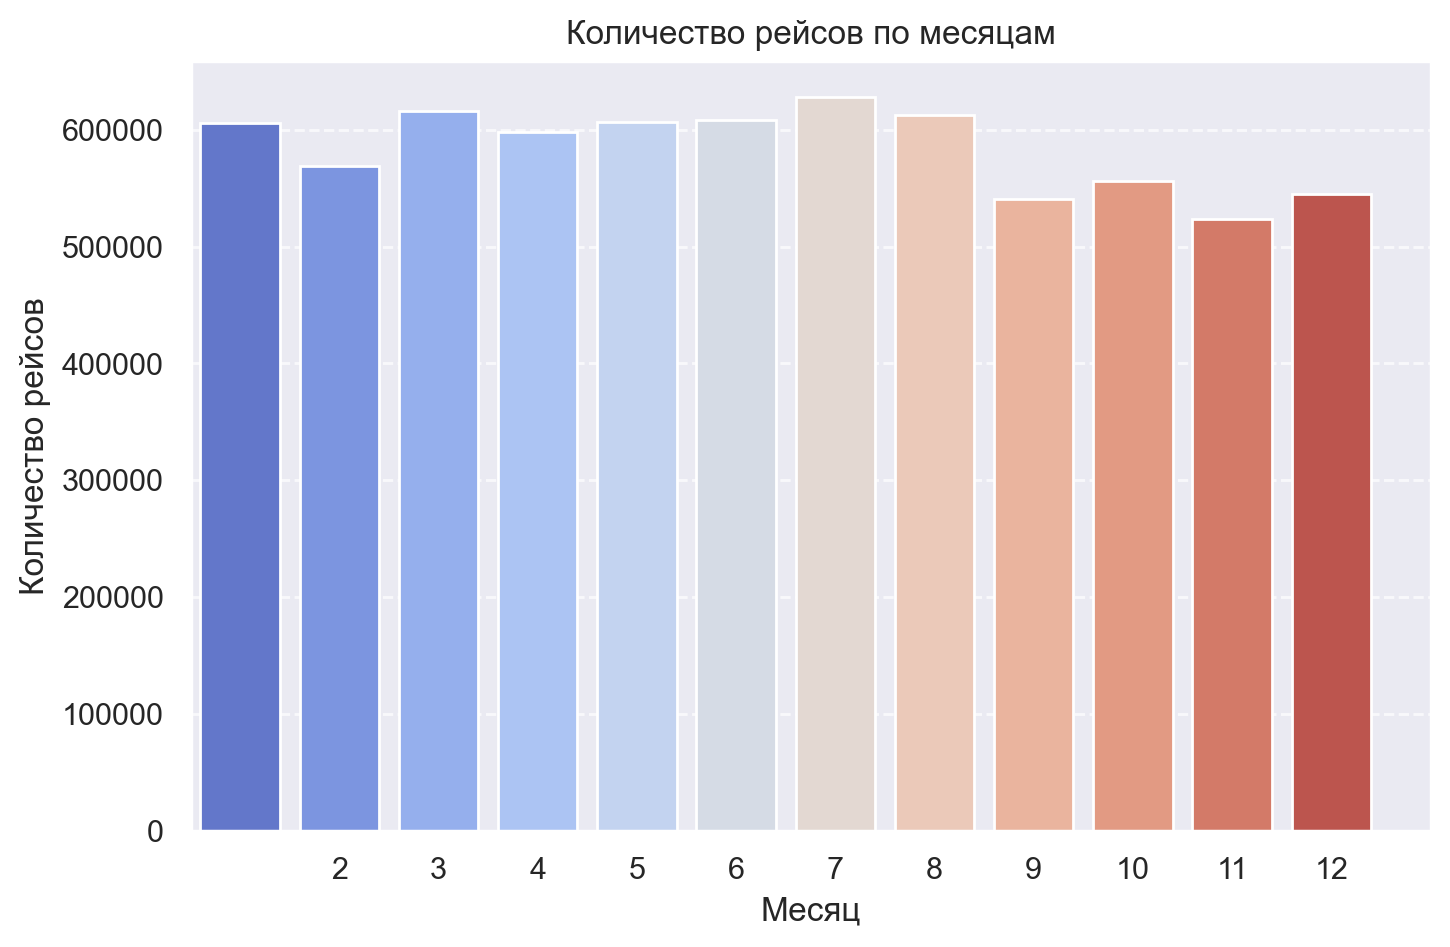

Количество рейсов в будни: 5175305
Количество рейсов в выходные: 1834423
 Количество рейсов в выходные дни меньше, чем в будние.
 Воскресенье не является днем с наименьшим числом рейсов.
Количество рейсов зимой: 1719959
Количество рейсов летом: 1848875
 Зимой рейсов меньше, чем летом.


In [55]:

# Создаем столбец с датой
flights_df["Date"] = pd.to_datetime(flights_df[["Year", "Month", "Day"]])

#  Анализ ежедневных рейсов 
daily_flights = flights_df.groupby("Date").size()

plt.figure(figsize=(12, 5))
plt.plot(daily_flights, color="blue")
plt.xlabel("Дата")
plt.ylabel("Количество рейсов")
plt.title("Динамика количества рейсов по дням")
plt.grid()
plt.show()

#  Анализ еженедельных рейсов
flights_df["DayOfWeek"] = flights_df["Date"].dt.dayofweek  # 0 - понедельник, 6 - воскресенье
weekly_flights = flights_df["DayOfWeek"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=weekly_flights.index, y=weekly_flights.values, palette="Blues_r")
plt.xticks(ticks=range(7), labels=["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"])
plt.xlabel("День недели")
plt.ylabel("Количество рейсов")
plt.title("Количество рейсов по дням недели")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#  Анализ ежемесячных рейсов 
monthly_flights = flights_df["Month"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_flights.index, y=monthly_flights.values, palette="coolwarm")
plt.xticks(range(1, 13))
plt.xlabel("Месяц")
plt.ylabel("Количество рейсов")
plt.title("Количество рейсов по месяцам")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#  Интерпретация 
weekend_flights = weekly_flights.loc[5] + weekly_flights.loc[6]  # Суббота + Воскресенье
weekday_flights = weekly_flights.sum() - weekend_flights

print(f"Количество рейсов в будни: {weekday_flights}")
print(f"Количество рейсов в выходные: {weekend_flights}")

if weekend_flights < weekday_flights:
    print(" Количество рейсов в выходные дни меньше, чем в будние.")
else:
    print(" Количество рейсов в выходные не меньше, чем в будние.")

# Проверяем наименьшее количество рейсов по дням недели
if weekly_flights.idxmin() == 6:
    print(" Наименьшее количество рейсов приходится на воскресенье.")
else:
    print(" Воскресенье не является днем с наименьшим числом рейсов.")

# Проверяем зимние и летние месяцы
winter_flights = monthly_flights.loc[[12, 1, 2]].sum()
summer_flights = monthly_flights.loc[[6, 7, 8]].sum()

print(f"Количество рейсов зимой: {winter_flights}")
print(f"Количество рейсов летом: {summer_flights}")

if winter_flights < summer_flights:
    print(" Зимой рейсов меньше, чем летом.")
else:
    print(" Зимой не меньше рейсов, чем летом.")



In [54]:
print(flights_df.columns)

Index(['Year', 'Month', 'Day', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepHour', 'Route',
       'Date'],
      dtype='object')


In [ ]:
#УРААААААААААААААААА

In [ ]:
Вопрос 16. Изучите распределение причин отмены во времени. Составьте диаграмму причин отмены, агрегированных по месяцам.

Выберите все правильные утверждения:

В октябре наименьшее количество отмен из-за погоды.
Наибольшее количество отмен в сентябре связано с соображениями безопасности.
Основная причина отмены рейсов в апреле – операторы связи.
Отмены рейсов по вине Национальной воздушной системы происходят чаще, чем по вине перевозчиков.

<Figure size 1200x600 with 0 Axes>

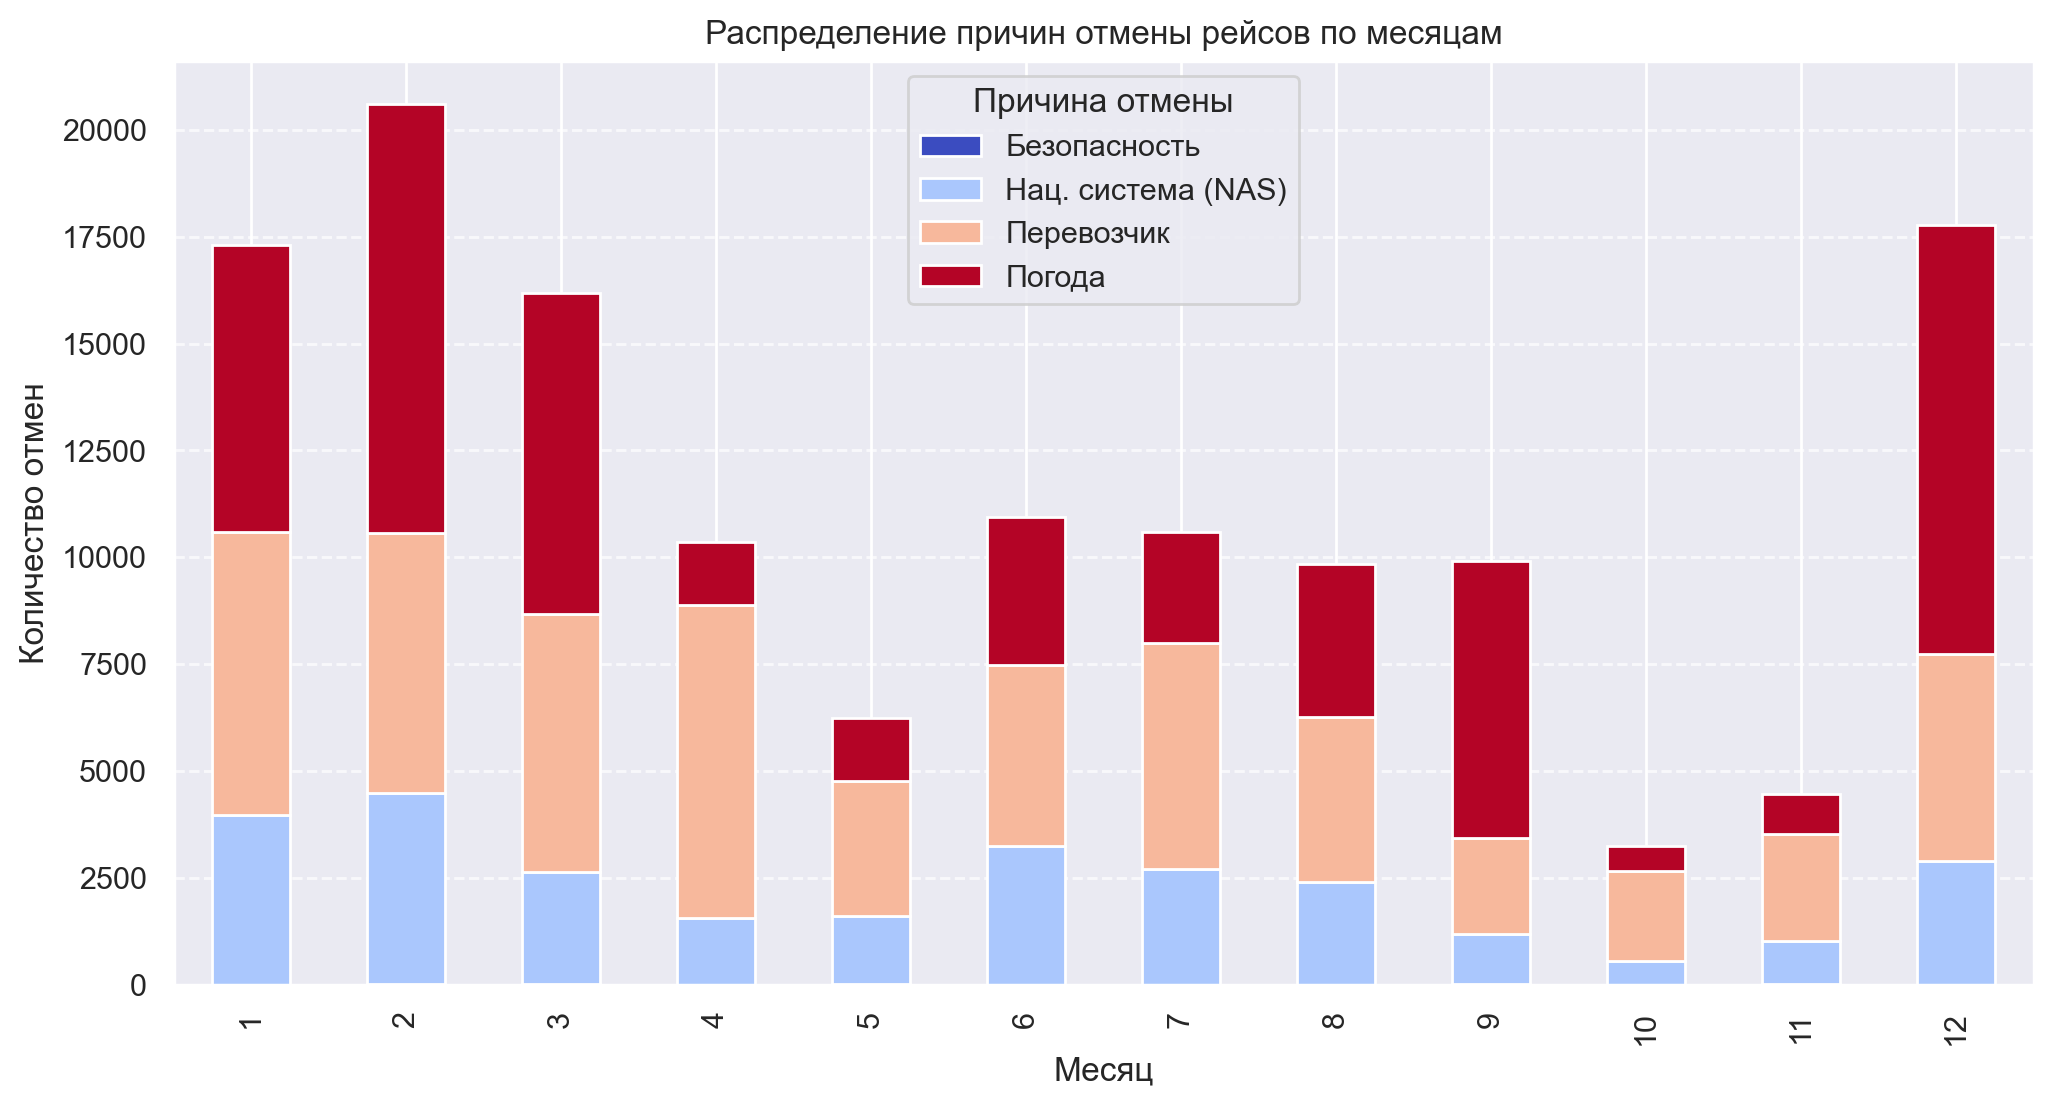

In [56]:
# отмененные рейсы заменяем коды отмен на названия
cancelled_flights = flights_df[flights_df["Cancelled"] == 1].copy()
cancelled_flights["CancellationCode"] = cancelled_flights["CancellationCode"].map({
    "A": "Перевозчик",
    "B": "Погода",
    "C": "Нац. система (NAS)",
    "D": "Безопасность"
})

# Группировка по месяцам 
monthly_cancellations = cancelled_flights.groupby(["Month", "CancellationCode"]).size().unstack()

# Визуализация
plt.figure(figsize=(12, 6))
monthly_cancellations.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))
plt.xlabel("Месяц")
plt.ylabel("Количество отмен")
plt.title("Распределение причин отмены рейсов по месяцам")
plt.legend(title="Причина отмены")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
#ОТВЕТ:В октябре наименьшее количество отмен из-за погоды.

In [ ]:
Вопрос 17. В каком месяце происходит наибольшее количество отмен по вине Carrier?

Май
Январь
Сентябрь
Апрель

C:\Users\timur\AppData\Local\Temp\ipykernel_10812\60279553.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_cancellations_by_month.index, y=carrier_cancellations_by_month.values, palette="Reds_r")


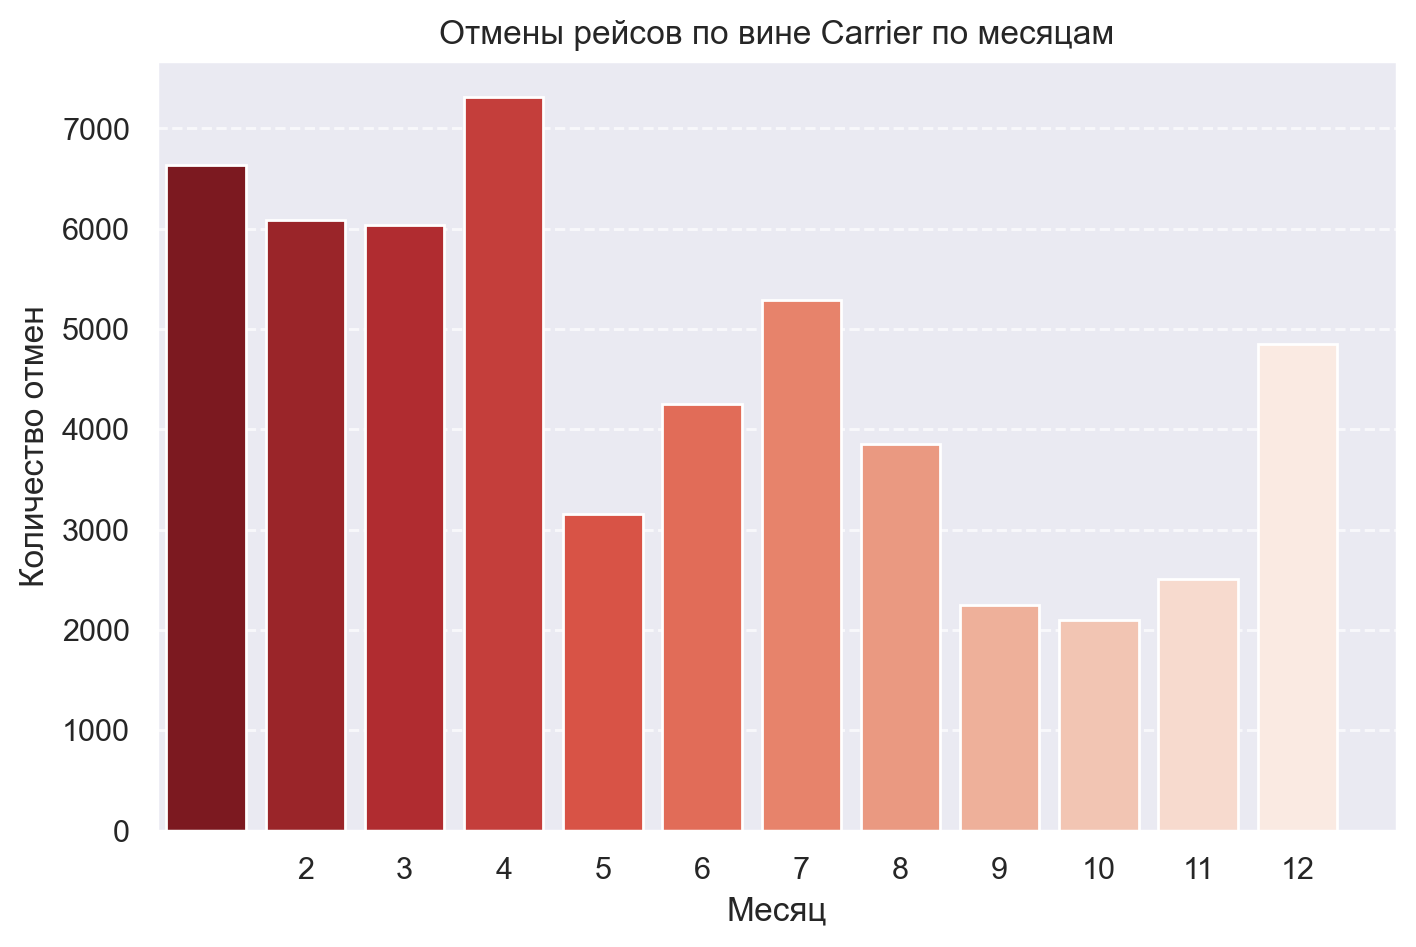

4


In [58]:
# Фильтр отмененные рейсы по вине Carrier (A)
carrier_cancellations = flights_df[(flights_df["Cancelled"] == 1) & (flights_df["CancellationCode"] == "A")]

# Группирввка месяцам  количество отмен
carrier_cancellations_by_month = carrier_cancellations["Month"].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=carrier_cancellations_by_month.index, y=carrier_cancellations_by_month.values, palette="Reds_r")
plt.xlabel("Месяц")
plt.ylabel("Количество отмен")
plt.title("Отмены рейсов по вине Carrier по месяцам")
plt.xticks(range(1, 13))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


max_cancellations_month = carrier_cancellations_by_month.idxmax()
print(max_cancellations_month)


In [59]:
#ОТВЕТ Апрель

In [ ]:
Вопрос 18. Определите перевозчика с наибольшим количеством отмен из-за перевозчика в соответствующем месяце из предыдущего вопроса.

9E
EV
HA
AA

Месяц с наибольшим количеством отмен по вине Carrier: 4


C:\Users\timur\AppData\Local\Temp\ipykernel_10812\1637018160.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_cancellations_by_airline.index, y=carrier_cancellations_by_airline.values, palette="coolwarm")


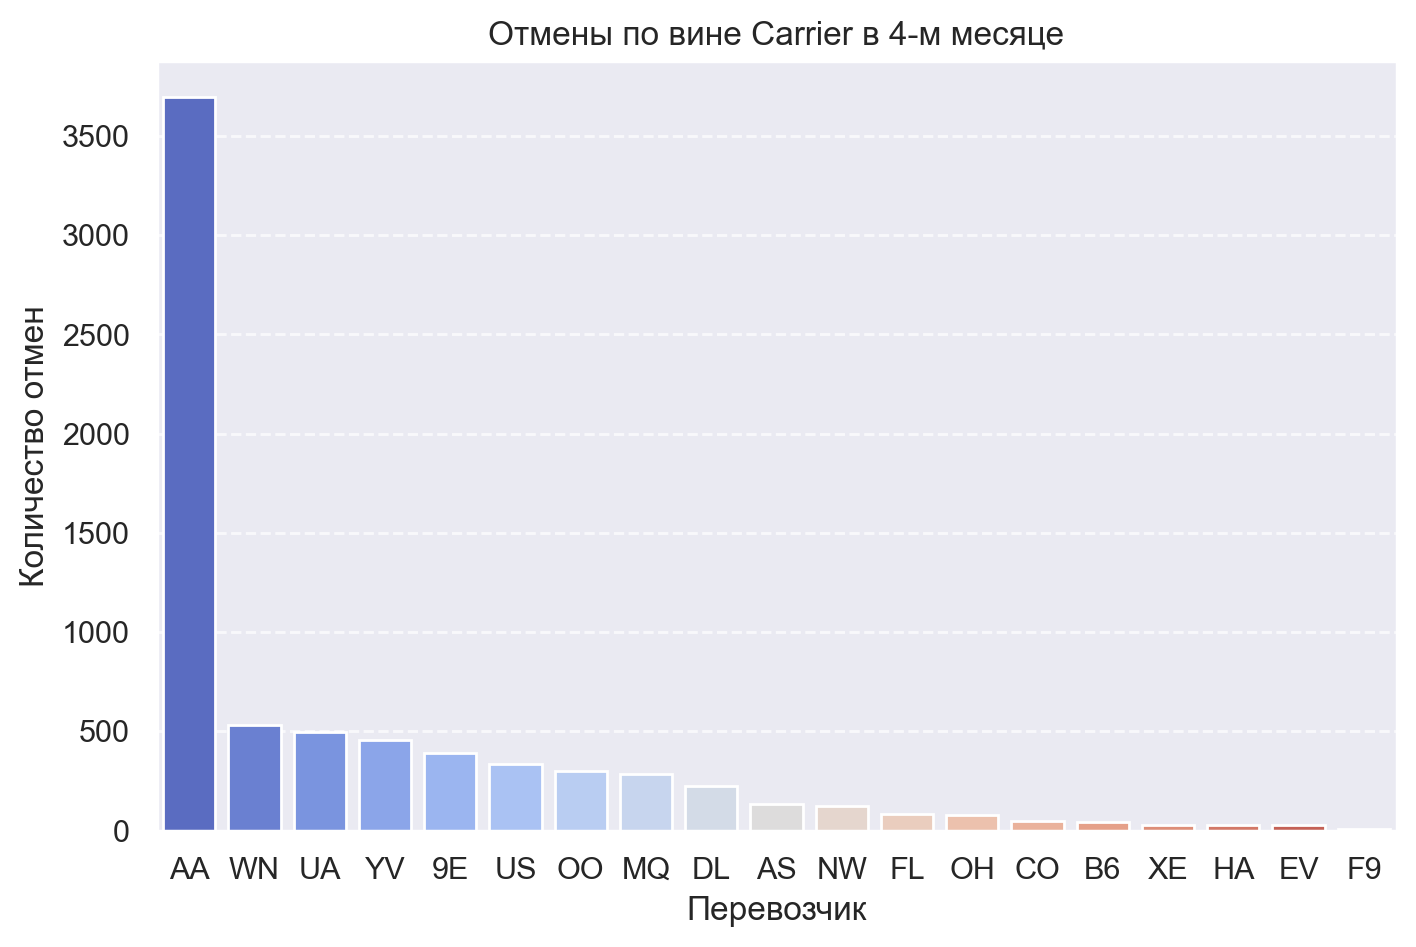

Перевозчик с наибольшим количеством отмен в 4: AA


In [60]:
# Фильтр только отмененные рейсы по вине Carrier (A)
carrier_cancellations = flights_df[flights_df["CancellationCode"] == "A"]

# Группивка по месяцам и количество отмен
monthly_cancellations = carrier_cancellations["Month"].value_counts().sort_index()

#  наибольше число отмен
max_cancellations_month = monthly_cancellations.idxmax()
print(f"Месяц с наибольшим количеством отмен по вине Carrier: {max_cancellations_month}")

# Фильтр отмененные рейсы месяцу
carrier_cancellations_month = carrier_cancellations[carrier_cancellations["Month"] == max_cancellations_month]

# Группирвка по перевозчику и считаем количество отмен
carrier_cancellations_by_airline = carrier_cancellations_month["UniqueCarrier"].value_counts()

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=carrier_cancellations_by_airline.index, y=carrier_cancellations_by_airline.values, palette="coolwarm")
plt.xlabel("Перевозчик")
plt.ylabel("Количество отмен")
plt.title(f"Отмены по вине Carrier в {max_cancellations_month}-м месяце")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


top_carrier = carrier_cancellations_by_airline.idxmax()
print(f"Перевозчик с наибольшим количеством отмен в {max_cancellations_month}: {top_carrier}")


In [ ]:
#ОТВет АА